*Линейный классификатор - нейронная сеть с одним слоем. Softmax, функция потерь cross-entropy. Тренировка с помощью стохастического градиентного спуска, регуляризация весов. Многослойные нейронные сети, fully-connected layers. Алгоритм backpropagation.*

---

## ЧТО НУЖНО ЗНАТЬ ПЕРЕД ЭТОЙ ЛЕКЦИЕЙ?

Дифференциирование сложной функции: https://www.youtube.com/watch?v=cFHdrl-E5O4

Градиент: https://www.youtube.com/watch?v=MKE6jXmvFwg

## Что такое нейронная сеть

Нейронная сеть — это сеть (спасибо К.О), состоящая из математических аналогов нейронов — перцептронов:

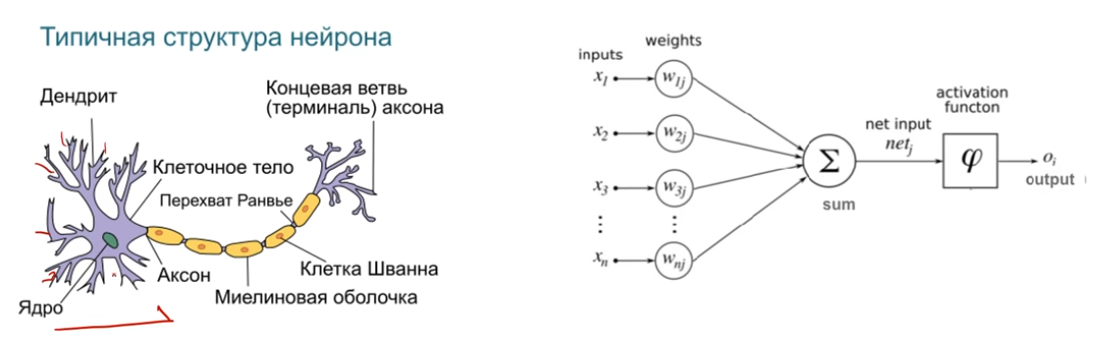

Он принимает некоторые значения (входные данные или выходные значения других нейронов), перемножает их на собственно вычисленные веса (например, в зависимости от важности входных данных для признаков), суммирует их и применяет фукнцию активации (преобразует сумму к дробному значению от 0 до 1). Полученное значение и будет выходным значнеим нейрона.

## Линейный классификатор

Зная информацию выше, мы можем построить простейшую нейронную сеть — каждый нейрон берёт все данные на вход, перемножает на некоторые (какие? далее по тексту) веса, добавляет некоторые (какие? далее по тексту) параметры и даёт окончательный выход:

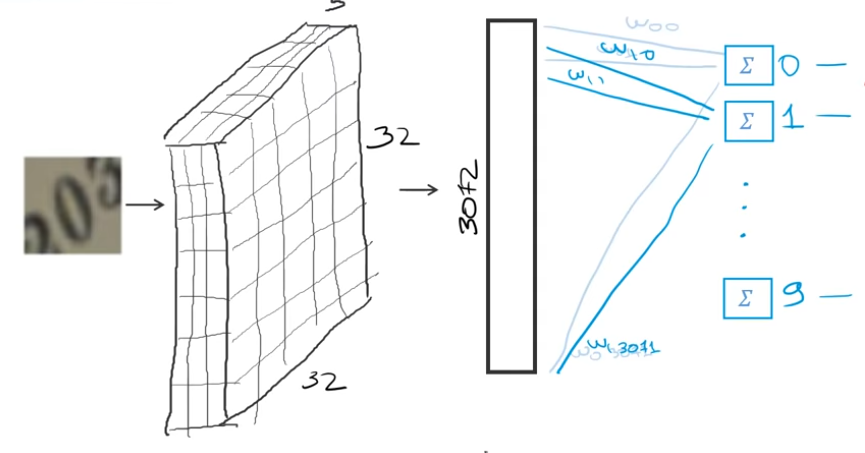

Такая простейшая нейронная сеть называется **линейным классификатором.**

Его работа сводится к формуле **X \* W + B = y**, где

- **X** — набор входных данных
- **W** — набор весов
- **B** — bias; некоторый набор гиперпараметров
- **y** — результаты предсказания

Пример линейного классификаторами с вычислениями вручную (перемножение и сложение матриц):

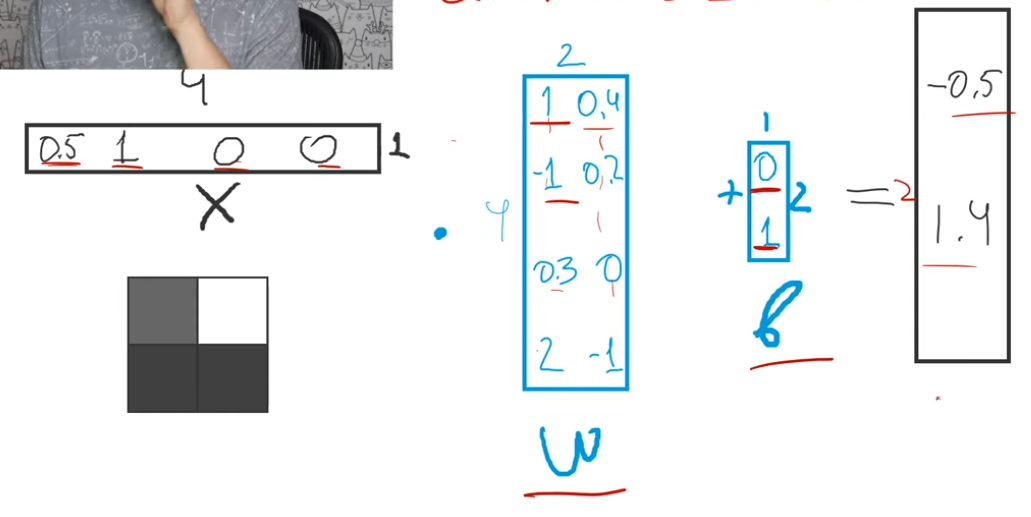

## Но как мы находим, КАКИЕ веса (**w**) / параметры (**b**) нам нужны???

**Методом градиентного спуска!** (чуть дальше он будет объясняться более подробно, но пока только введение)

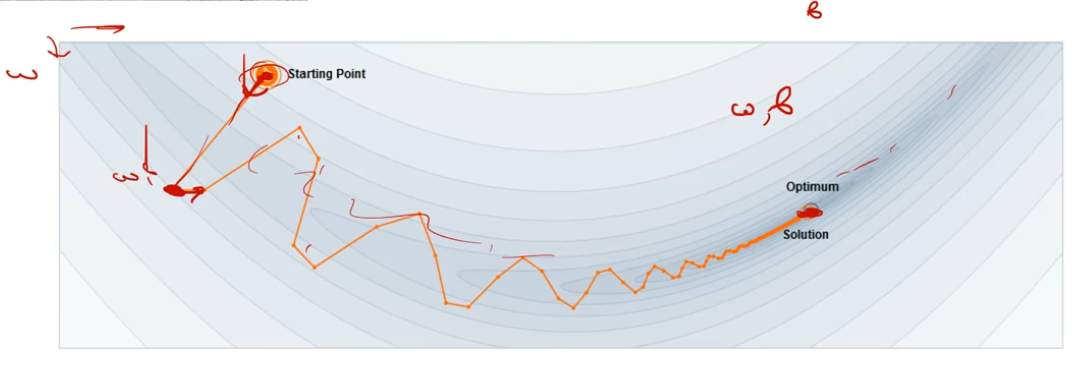

Изначально мы берём случайные значения **w** или **b**, после чего считаем градиент функции потерь и получаем "направление", в которое нужно "двигаться", чтобы улучшить результат. После этого мы "двигаемся" туда на некоторый шаг и повторяем процедуру снова и снова, пока после какого-то числа шагов не придём к некоторому достаточно хорошему, уже мало меняющемуся (**оптимальному**) значению. Это будет означать, что мы пришли к некоторому локальному — в идеальном случае глобальному — минимуму.

## Softmax

Теперь нам нужно каким-то образом свети результаты предсказания **y** до какого-то числа, чтобы уже их подставить в метод градиентного спуска. Нам нужно привести их к каким-то вероятностям (0..1), сумма которых равна 1.

Воспользуемся для этого формулой мягких максимумов aka Softmax (может использовать и другая фукнция):

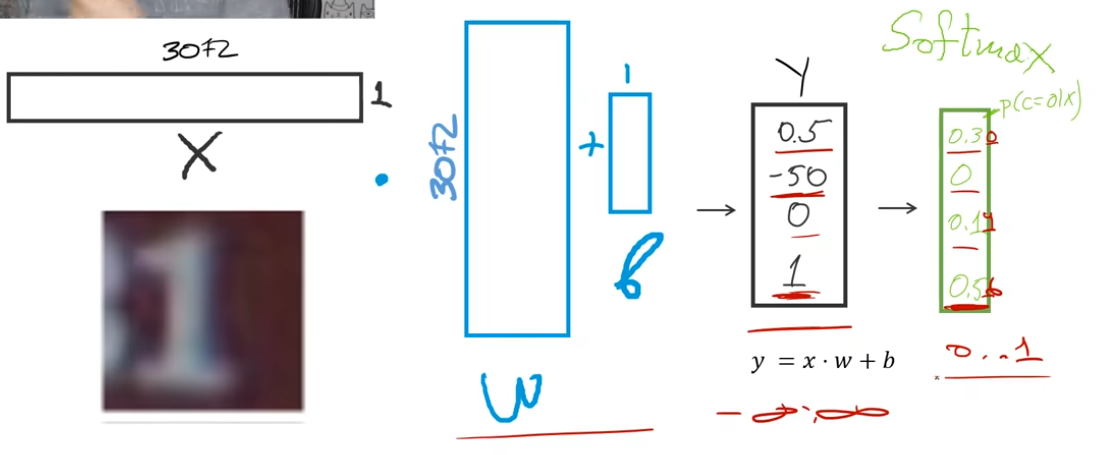

Для N-го (в формуле ниже — 0-го) результата  предсказания **y** формула Softmax будет выглядеть так:

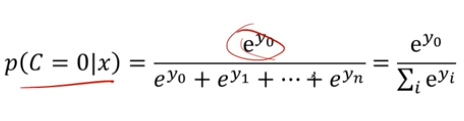

(экспонента 0-го результата пресказания, делённая на сумму экспонент результатов предсказания)

---

#### Ахтунг! Дальше идёт вынос моска!

---

## Принцип макисмального правдоподобия

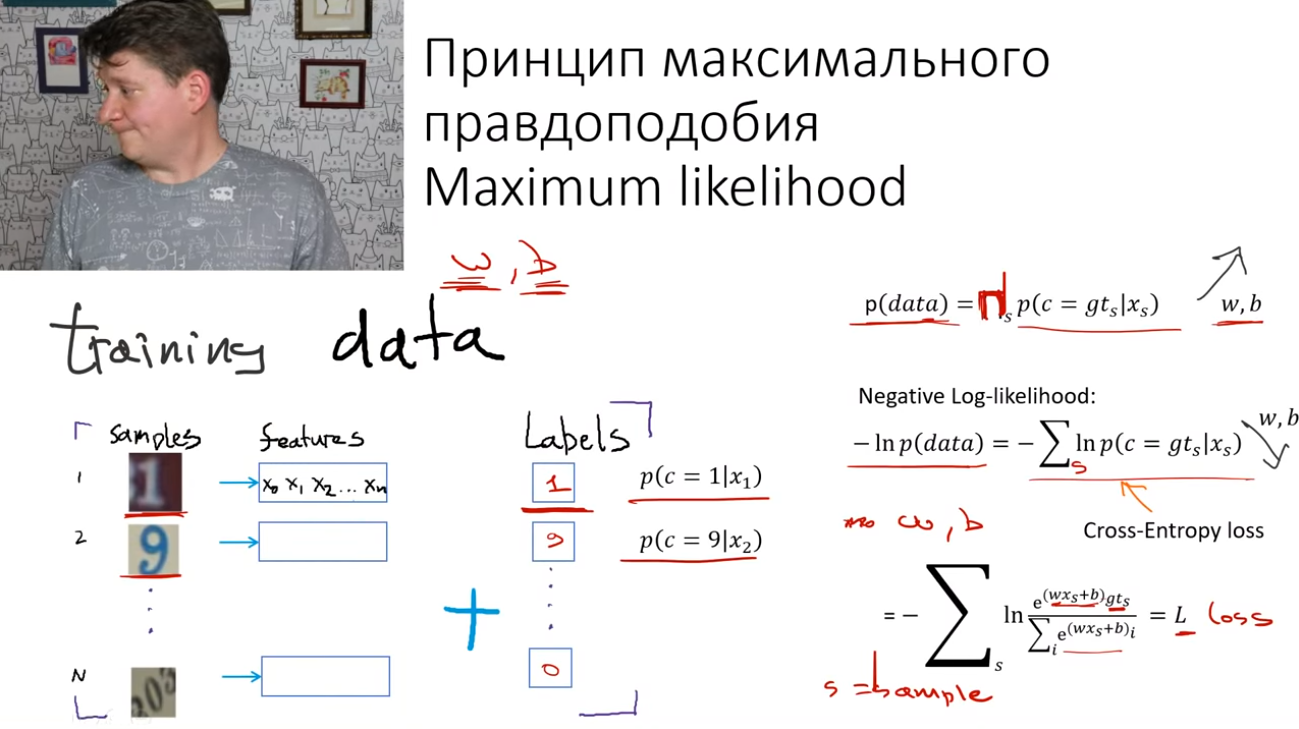

## Регуляризация

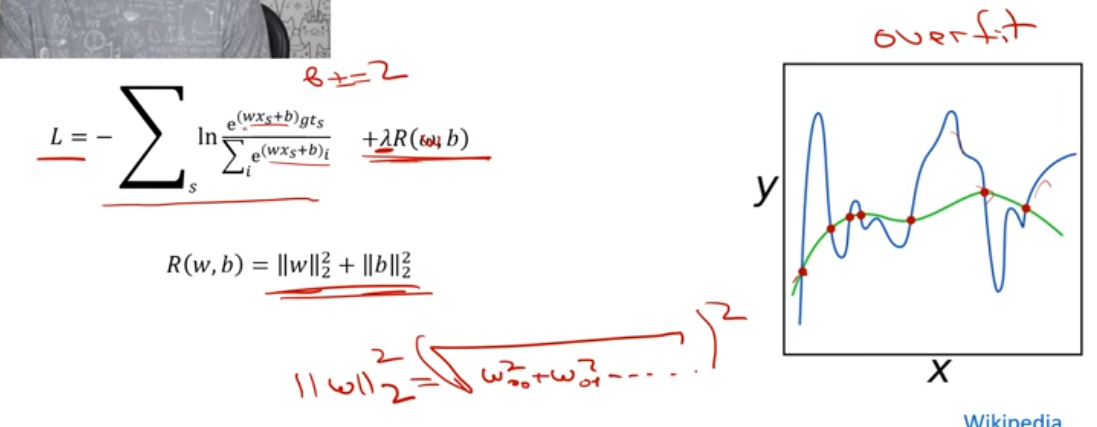

(усложняем задачу оптимизации, но улучшаем приближение вероятностей на новых (напр., тестовых) данных)

## Градиентный спуск

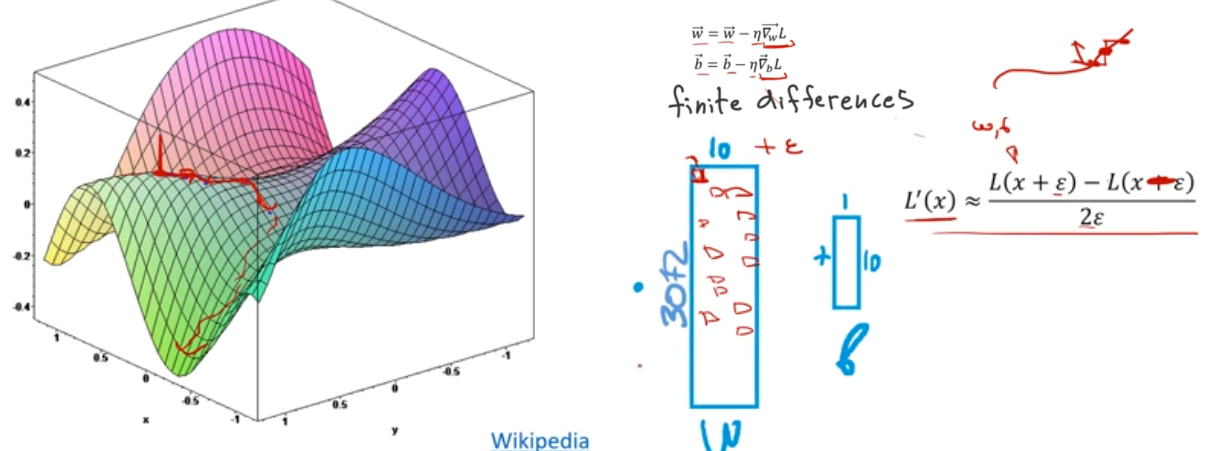

## Стохастический градиентный спуск (Stochastic Gradient Descent, SGD)

На практике, посчитать градиент для большого числа данных — дело невероятно время- и ресурсозатратное.

SGD позволяет очень сильно оптимизировать процесс вычисления ("схождения") градиента — вместо всех (здесь) элементов мы берём небольшую, случайного их часть (minibatch, мини-датасет).

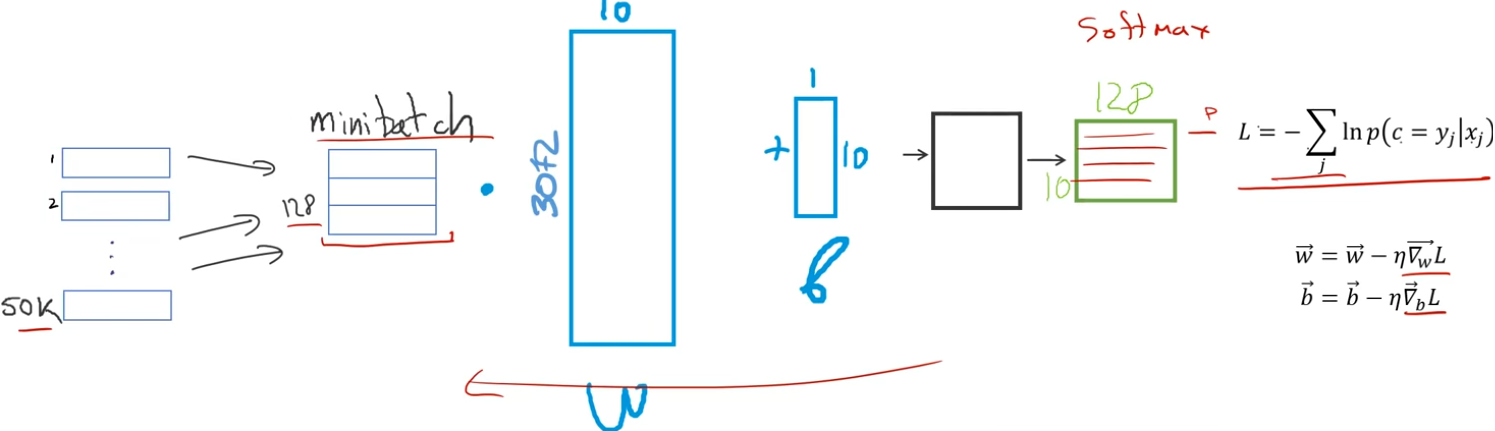

*Что происходит на картинке выше:*
1. Из датасета на 50000 элементов случайно выберем минибатч из 128 -> получим матрицу 128х3072
2. Перемножим их на маьрицу весов: 128х3072 * 3072*10 -> получим матрицу 128х10
3. *(если имеются, иначе сразу на шаг 4)* Добавим наши параметры: 128х10 + 1*10 -> получим матрицу резузльтатов 128х10
4. Используем Softmax -> получим матрицу результатов от 0 до 1 (вероятности) 128х10
5. Вычисляем градиентный спуск, сумму берём не для всего датасета, а только для выбранного минибатча 
6. Делаем градиентный шаг на веса
7. Повторяем с шага 1 для нового случайного минибатча на новых весах и параметрах; останавливаемся только тогда, когда точность перестаёт уменьшаться (т.е. шаг от шага точность просто "шатается" туда-сюда)

---

#### Дополнительные ресурсы на тему (на англюсике), если не понятно, что вообще происходит выше:

https://cs231n.github.io/linear-classify/

https://cs231n.github.io/optimization-1/

https://cs231n.github.io/optimization-2/

---

## Так вот, нейронные сети

Итак, выше мы отравились мата́ном, а ещё выше — рассмотрели одну из простейших нейронных сетей:

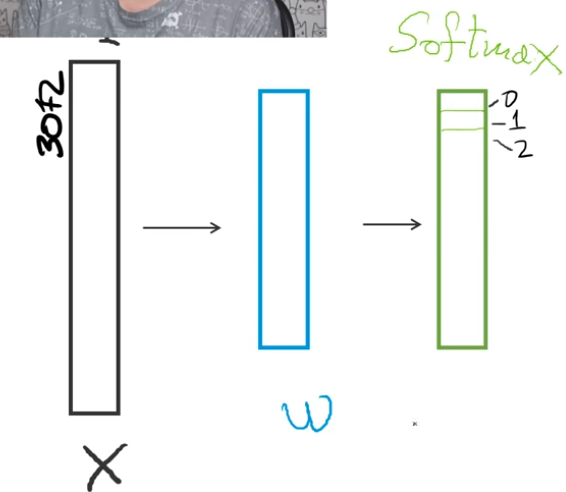

Мы можем усложнять её конструкцию, просто добавляя больше слоёв весов. Но просто перемножение такого вида будет эквивалентно просто перемножению на произведение весов — что же делать? Вставить между шагами *нелинейную функцию*, или **фукнцию активации**:

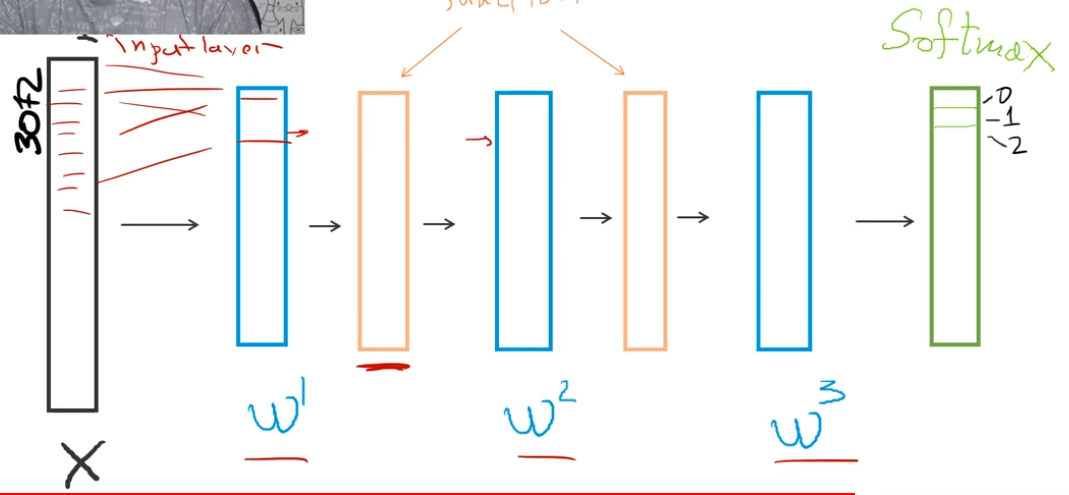

Примеры фукнций активации (TLDR — раньше почти всегда использовали сигмоиду или tanh, теперь — ReLU, потому что оказалось, что такая куда менее нелинейная фукнция даёт результаты лучше "плавных" линейных функций):

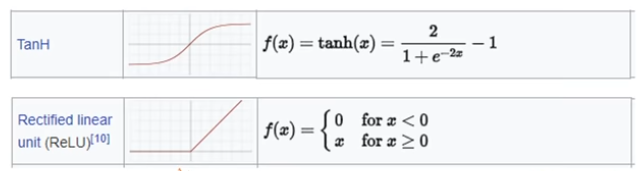

## Как считать этотсамый?

Представим формулу вычисления выше как направленный граф вычислений:

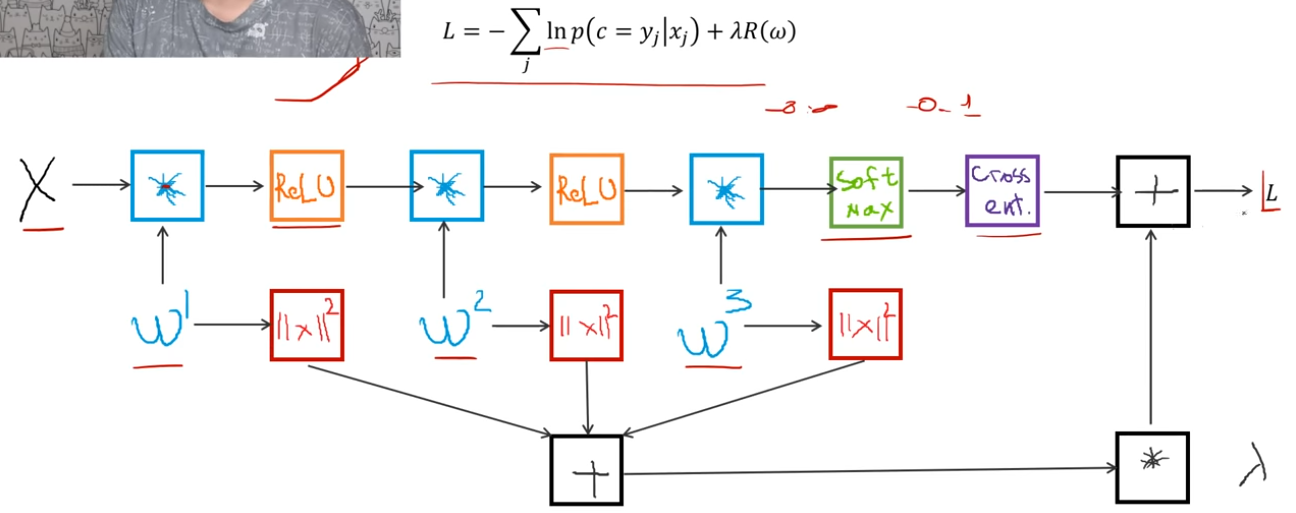

Как мы можем выполнить эти вычисления эффективно? С помощью алгоритма **обратного распространения ошибки (Back Propagation)!**

Как он работает? Рассмотрим на "игрушечном" примере для некоторой функции **f**:

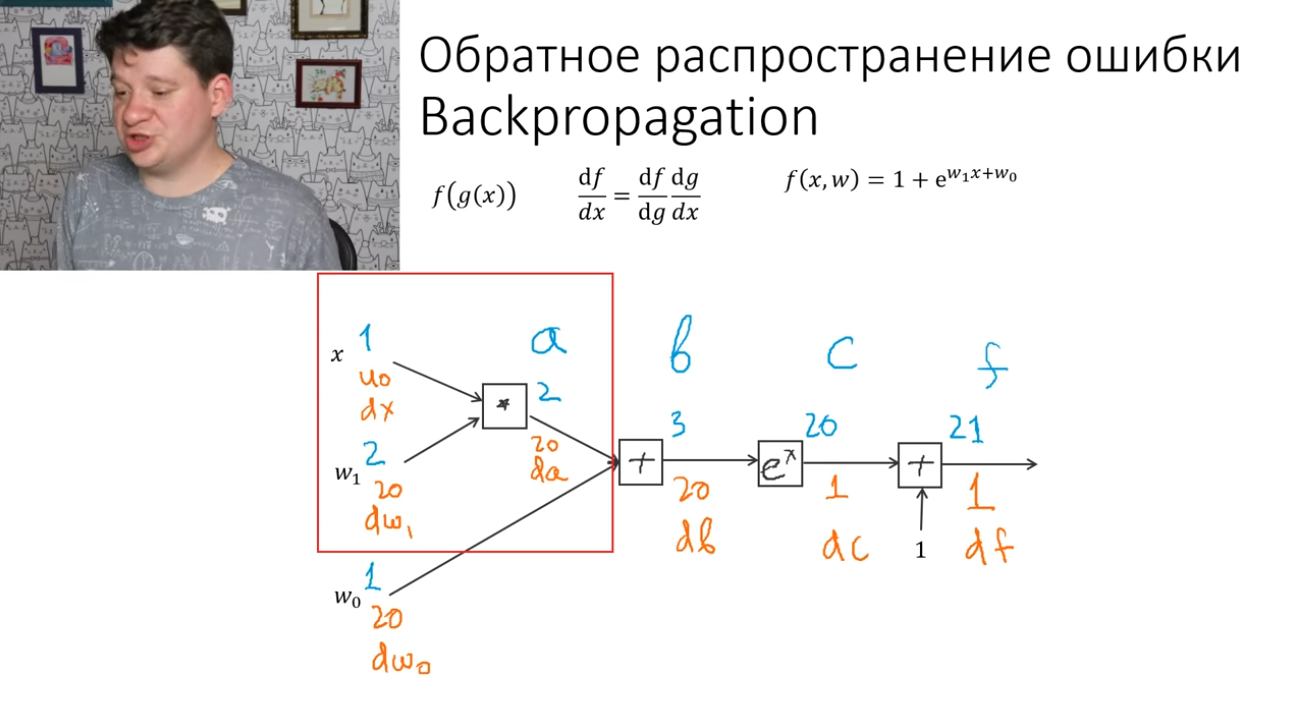

То есть, вместо сложных аналитических вычисления, обратным проходом по графу и ипсользуя предыдущие вычисления, только локальными вычислеиями (т.е. не выписывая формулу **f** целиком) по одному разу, вычислить производные и градиенты для каждого узла графа. В случае с нейросетями, вместо чисел будут матрицы, но принцип останется прежним. 

В коде на Python это выглядит так (forward — прямой проход, backward — обратный проход):

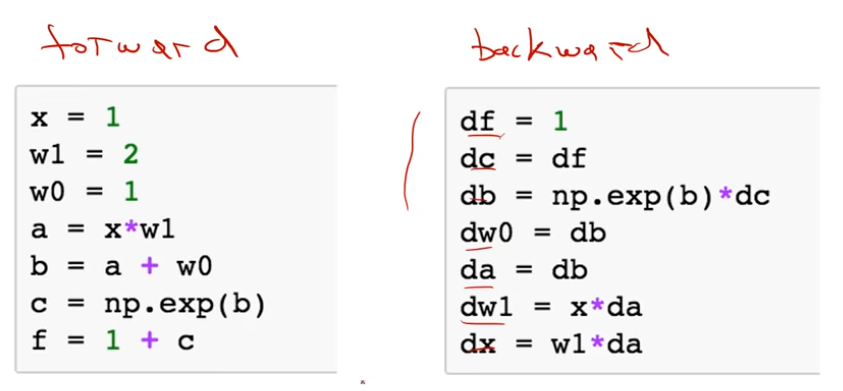

Таким образом, это даёт нам возможность пройтись (например, в графе вычислений выше) от расчитанной фукнции потерь обратно до начальных значений, скорректировав их, и затем повторять циклично этот процесс прохода вперёд-назад.

## Всё ещё ничего не понятно!!!1

#### 3Blue1Brown: https://www.youtube.com/watch?v=Ilg3gGewQ5U

*Фухххххххххххх, картинка на превьюшке видео прям идеально описывает как себя чувствуешь после этой лекции; хотя, он говорил, что дальше будет проще, если разобраться, что происходит здесь — верим, я поверил.*